<a href="https://colab.research.google.com/github/ahmadraza741/House-Price-Prediction/blob/main/House_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **HOUSE PRICE PREDICTION**

This is the project done on california housing dataset for the prediction of the house price with the Linear Regression model.

We will go through some of the steps like:
1.   Loading the Dataset
2.   Data Exploration
3.   Data Preprocessing and Model exploration
4.   Model Evaluation
5.   Prediction
6.   Model performance

Using some SkLearn API like preprocessing, model_selection, compose etc. we will try to formulate our model and predict the efficiency of our model as high as possible. Also by performing Hyperparameter tuning we can increase the efficiency of our model.
So lets begin...



In [ ]:
#importing SkLearn APIs
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
% matplotlib inline

from sklearn.datasets import fetch_california_housing
from sklearn.linear_model import LinearRegression

from sklearn.preprocessing import OneHotEncoder, StandardScaler

from sklearn.model_selection import train_test_split
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import learning_curve
from sklearn.model_selection import cross_val_predict, cross_val_score, cross_validate

from sklearn.metrics import mean_squared_error, mean_absolute_error

In [ ]:
# setting up the random_state value for having the same data value to be loaded.
np.random.seed(42)
plt.style.use('seaborn')

###Step1:**Loading the Dataset**

In [ ]:
features, label = fetch_california_housing(as_frame=True, return_X_y=True)

Now that we have separated features and label from california housing dataset. Lets start examining the dataset.

In [ ]:
print(f"shape of the feature:{features.shape}")
print(f"shape of the label:{label.shape}")

shape of the feature:(20640, 8)
shape of the label:(20640,)


###Step2:**Data Exploration**

1. Number of Instances: **20640**

2. Number of Attributes: **8 numeric, predictive attributes and the target**

3. Attribute Information: 
                          **MedInc median income in block group**

                          **HouseAge median house age in block group**

                          **AveRooms average number of rooms per household**

                          **AveBedrms average number of bedrooms per household**

                          **Population block group population**

                          **AveOccup average number of household members**

                          **Latitude block group latitude**

                          **Longitude block group longitude**

An household is a group of people residing within a home. Since the average number of rooms and bedrooms in this dataset are provided per household, these columns may take surpinsingly large values for block groups with few households and many empty houses, such as vacation resorts.

It can be downloaded/loaded using the https://colab.research.google.com/drive/1OQ4czWu8QvH3LzhGUTr4tLFQ9tELcsGf#scrollTo=WZa6tQZ7buND&line=24&uniqifier=1 function.

In [ ]:
housing_data = fetch_california_housing()
housing_df = pd.DataFrame(data=housing_data["data"],columns=housing_data["feature_names"])
housing_df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


In [ ]:
housing_df["target"] = housing_data["target"]

In [ ]:
housing_df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


In [ ]:
housing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
 8   target      20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [ ]:
housing_df.isna().sum()

MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
target        0
dtype: int64

There are no NaN value in the california housing dataset. So now we can proceed to the further steps...

In [ ]:
housing_df.describe().T

,count,mean,std,min,25%,50%,75%,max
MedInc,20640.0,3.870671,1.899822,0.499900,2.563400,3.534800,4.743250,15.000100
HouseAge,20640.0,28.639486,12.585558,1.000000,18.000000,29.000000,37.000000,52.000000
AveRooms,20640.0,5.429000,2.474173,0.846154,4.440716,5.229129,6.052381,141.909091
AveBedrms,20640.0,1.096675,0.473911,0.333333,1.006079,1.048780,1.099526,34.066667
Population,20640.0,1425.476744,1132.462122,3.000000,787.000000,1166.000000,1725.000000,35682.000000
AveOccup,20640.0,3.070655,10.386050,0.692308,2.429741,2.818116,3.282261,1243.333333
Latitude,20640.0,35.631861,2.135952,32.540000,33.930000,34.260000,37.710000,41.950000
Longitude,20640.0,-119.569704,2.003532,-124.350000,-121.800000,-118.490000,-118.010000,-114.310000
target,20640.0,2.068558,1.153956,0.149990,1.196000,1.797000,2.647250,5.000010


As we can observe that the features of the dataset have higher difference in the 75% quartile range and the maximum value there must be outliers in the dataset.

In [ ]:
features.columns

Index(['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup',
       'Latitude', 'Longitude'],
      dtype='object')

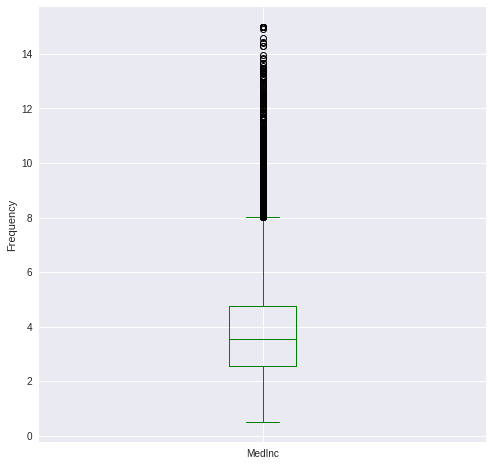

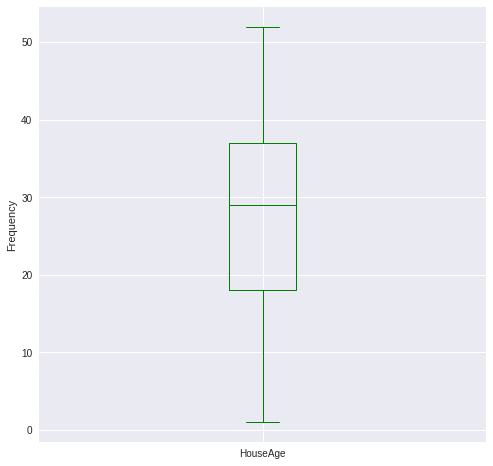

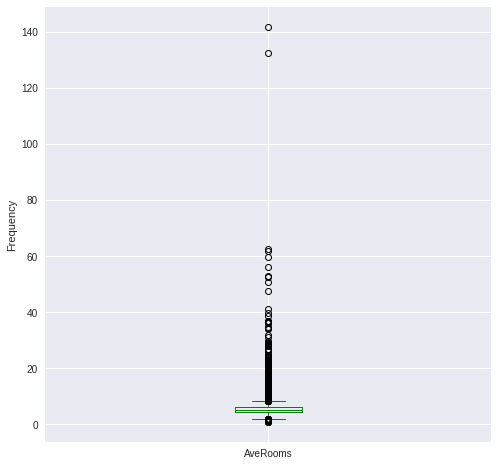

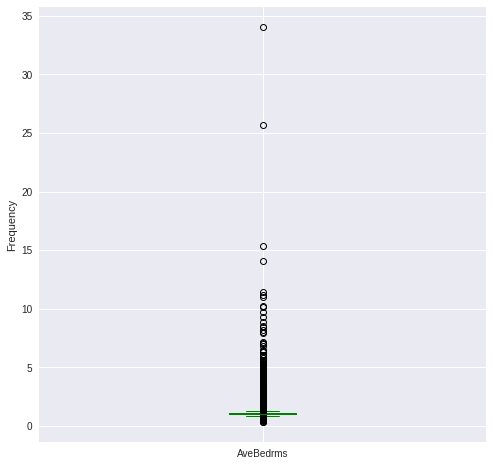

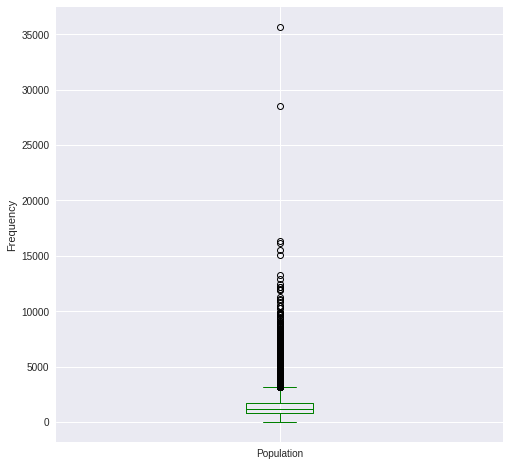

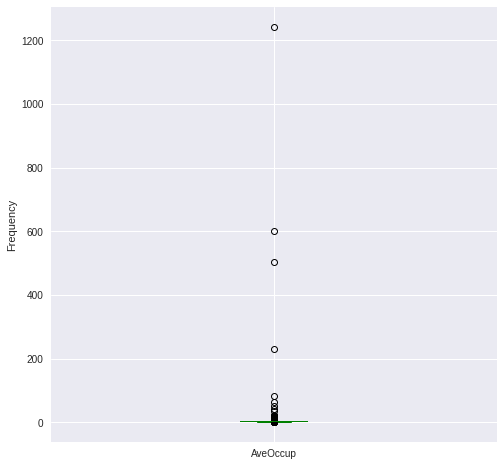

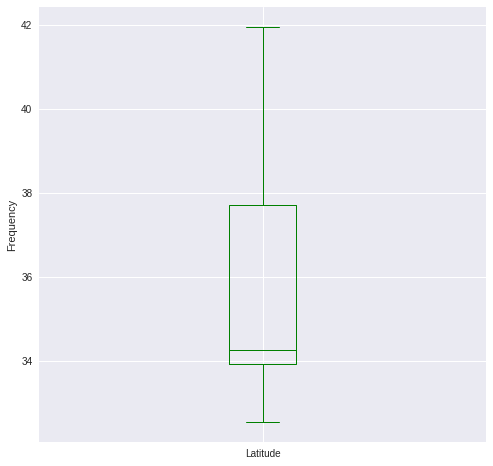

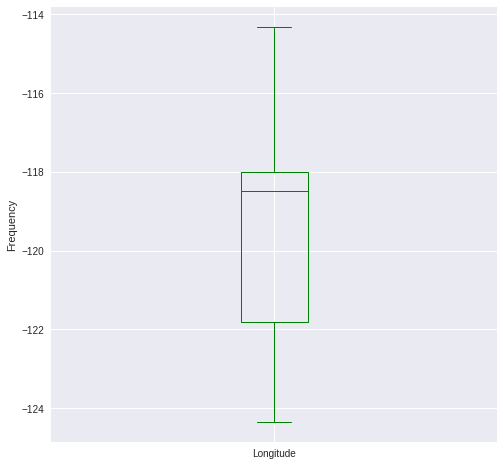

In [ ]:
for i in range(len(features.columns)):
  housing_df[features.columns[i]].plot(kind='box',figsize=(8,8),color='g')
  plt.ylabel("Frequency")
  plt.show();

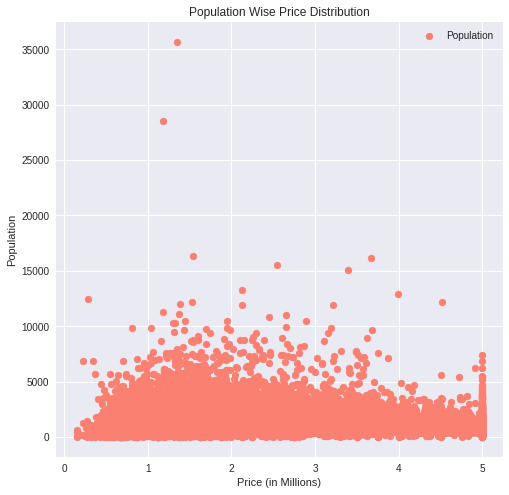

In [ ]:
plt.figure(figsize=(8,8))
plt.scatter(housing_df.target,housing_df.Population,color='salmon')
plt.xlabel("Price (in Millions)")
plt.ylabel("Population")
plt.title("Population Wise Price Distribution")
plt.legend(['Population'])
plt.show()

In [ ]:
housing_df.Population.mean()

1425.4767441860465

From the above graph we can observe that the major population say above 5000 are residing where the house price is 2M.

In [ ]:
fea_n = housing_data["target"].reshape(-1,1)
fea_n

array([[4.526],
       [3.585],
       [3.521],
       ...,
       [0.923],
       [0.847],
       [0.894]])

In [ ]:
from sklearn.preprocessing import KBinsDiscretizer
kbd = KBinsDiscretizer(n_bins=5, strategy='uniform', encode='ordinal')
fea_n_kbd = kbd.fit_transform(fea_n)

In [ ]:
fea_n_kbd

array([[4.],
       [3.],
       [3.],
       ...,
       [0.],
       [0.],
       [0.]])

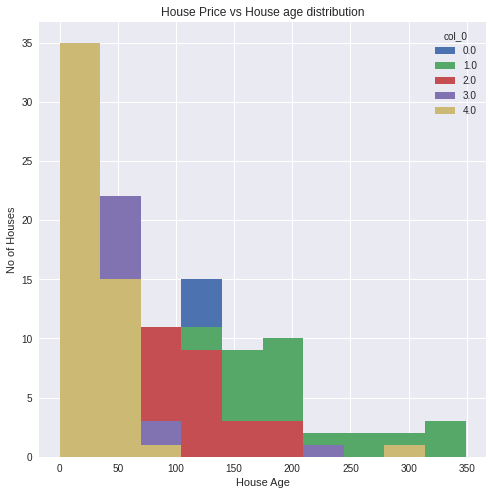

In [ ]:
pd.crosstab(housing_df['HouseAge'],fea_n_kbd.flatten()).plot(kind='hist',figsize=(8,8))
plt.xlabel('House Age')
plt.ylabel('No of Houses')
plt.title('House Price vs House age distribution')
plt.show();

From the above Histogram we can observe that the House age between 0 to 50 years having House price of 4M are larger in frequency of about 50. The price of Old houses are relatively low as the histogram shows the relative decrease in the price as the age of house increases.

###Step3:**Data Preprocessing and Model Exploration**

In [ ]:
x = housing_df.drop("target",axis=1)

In [ ]:
y = housing_df["target"]

In [ ]:
print(f'Feature Samples {x.shape}')
print(f'Label Samples {y.shape}')

Feature Samples (20640, 8)
Label Samples (20640,)


Now that we have created feature matrix(x) and label vector(y) lets begin to split our feature and label set to train set and test set. The train set will be used to fit the model and do the preprocessing.

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x,
                                                 y,
                                                 test_size=0.2,
                                                 random_state=42)

In [ ]:
print(f'Training Samples(Feature): {x_train.shape[0]}')
print(f'Test Samples(Feature): {x_test.shape[0]}')

Training Samples(Feature): 16512
Test Samples(Feature): 4128


Now we will use pipeline API for building the model and carry out the feature scaling simultaneously.
Some of the components of the pipeline are:
```# 
*   StandardScaler
*   LinearRegression
```



In [ ]:
from sklearn.pipeline import Pipeline
lin_reg_pipeline = Pipeline([("feature scaling", StandardScaler()),
                             ("Lin_reg", LinearRegression(fit_intercept=True))])
# Now training the Linear Regression model with Normal Equation
lin_reg_pipeline.fit(x_train,y_train)

Pipeline(steps=[('feature scaling', StandardScaler()),
                ('Lin_reg', LinearRegression())])

In [ ]:
print(f'Coefficient w_1,...w_n:{lin_reg_pipeline[-1].coef_}')
print(f'Intercept w_0:{lin_reg_pipeline[-1].intercept_}')

Coefficient w_1,...w_n:[ 0.85438303  0.12254624 -0.29441013  0.33925949 -0.00230772 -0.0408291
 -0.89692888 -0.86984178]
Intercept w_0:2.0719469373788777


###Step4: **Model Evaluation**

In [ ]:
train_score = lin_reg_pipeline.score(x_train,y_train)
print('Model performance on train set: ', train_score)
test_score = lin_reg_pipeline.score(x_test,y_test)
print('Model performance on test set: ', test_score)

Model performance on train set:  0.6125511913966952
Model performance on test set:  0.575787706032451


The `score` method returns the `r2 score` which can be maximum upto 1.

####Cross Validation

In [ ]:
shuffle_split_cv = ShuffleSplit(n_splits=5, test_size=0.3,random_state=0)

In [ ]:
lin_reg_cv = cross_val_score(lin_reg_pipeline,x,y,scoring='neg_mean_squared_error',cv=shuffle_split_cv)
print(lin_reg_cv)

[-0.54314897 -0.53795479 -0.54581882 -0.49224204 -0.52199088]


In [ ]:
print(f'score of linear regression model on the test set: {lin_reg_cv.mean():.3f} +/- {lin_reg_cv.std():.3f}')

score of linear regression model on the test set: -0.528 +/- 0.020


In [ ]:
lin_reg_mse = -lin_reg_cv
print(f'mean_squared error of linear regression model on the test set: {lin_reg_mse.mean():.3f} +/- {lin_reg_mse.std():.3f}')

mean_squared error of linear regression model on the test set: 0.528 +/- 0.020


Some of the important `scoring parameters` used in `linear regression` model are:


*   r2_score
*   neg_mean_squared_error
*   neg_mean_absolute_error
*   neg_mean_squared_log_error
*   neg_root_mean_squared_error
*   explained_variance
*   neg_mean_absolute_percentage_error
*   neg_median_absolute_error
*   max_error



####Cross_validate

In [ ]:
lin_reg_cv_re = cross_validate(lin_reg_pipeline,
                               x,y,
                               scoring='neg_mean_squared_error',
                               cv=shuffle_split_cv,
                               return_train_score=True,
                               return_estimator=True)


`cross_validate` returns a dictionary with the following contents:


1.   Test_score
2.   Train_score
3.   Estimator Used
4.   Fit time
5.   Score time

Now let us see the dictionary returned by the cross validate:-



In [ ]:
lin_reg_cv_re

{'estimator': [Pipeline(steps=[('feature scaling', StandardScaler()),
                  ('Lin_reg', LinearRegression())]),
  Pipeline(steps=[('feature scaling', StandardScaler()),
                  ('Lin_reg', LinearRegression())]),
  Pipeline(steps=[('feature scaling', StandardScaler()),
                  ('Lin_reg', LinearRegression())]),
  Pipeline(steps=[('feature scaling', StandardScaler()),
                  ('Lin_reg', LinearRegression())]),
  Pipeline(steps=[('feature scaling', StandardScaler()),
                  ('Lin_reg', LinearRegression())])],
 'fit_time': array([0.03946805, 0.01834059, 0.01875114, 0.01851869, 0.02782488]),
 'score_time': array([0.01185417, 0.00443244, 0.00472498, 0.00608706, 0.02336025]),
 'test_score': array([-0.54314897, -0.53795479, -0.54581882, -0.49224204, -0.52199088]),
 'train_score': array([-0.51730034, -0.52085193, -0.52068754, -0.53855437, -0.52636495])}

In [ ]:
train_score_cv_re = lin_reg_cv_re['train_score']
print(f"Train score on the Linear regression model: {train_score_cv_re.mean():.3f} +/- {train_score_cv_re.std():.3f}")
test_score_cv_re = lin_reg_cv_re['test_score']
print(f"Test score on the linear regression model: {test_score_cv_re.mean():.3f} +/- {test_score_cv_re.std():.3f}")

Train score on the Linear regression model: -0.525 +/- 0.007
Test score on the linear regression model: -0.528 +/- 0.020


In [ ]:
train_mse_cv_re = -lin_reg_cv_re['train_score']
print(f"Mean squared error of Linear regression model on the train set: {train_mse_cv_re.mean():.3f} +/- {train_mse_cv_re.std():.3f}")
test_mse_cv_re = -lin_reg_cv_re['test_score']
print(f"Mean squared error of Linear regression model on the test set: {test_mse_cv_re.mean():.3f} +/- {test_mse_cv_re.std():.3f}")


Mean squared error of Linear regression model on the train set: 0.525 +/- 0.007
Mean squared error of Linear regression model on the test set: 0.528 +/- 0.020


####Learning Curve

In [ ]:
# function for plotting a learning curve
def plot_learning_curve(train_sizes,train_scores,test_scores,fit_times):

  train_scores_mean = np.mean(-train_scores, axis=1)
  test_scores_mean = np.mean(-test_scores, axis=1)
  train_scores_std = np.std(-train_scores, axis=1)
  test_scores_std = np.std(-test_scores, axis=1)
  fit_times_mean = np.mean(fit_times, axis=1)
  fit_times_std = np.std(fit_times, axis=1)

  plt.plot(train_sizes,train_scores_mean,"o-",color='r',label="training_score")
  plt.plot(train_sizes,test_scores_mean,"o-",color='g',label='cross_validation_score')
  plt.xlabel("Training Examples")
  plt.ylabel("MSE")
  plt.legend(loc="best")
  return

In [ ]:
(train_sizes,train_scores,test_scores,fit_times,score_times) = learning_curve(lin_reg_pipeline,
                                                                              x,
                                                                              y,
                                                                              cv=shuffle_split_cv,
                                                                              scoring="neg_mean_squared_error",
                                                                              return_times=True,
                                                                              train_sizes=np.linspace(0.2,1.0,10))

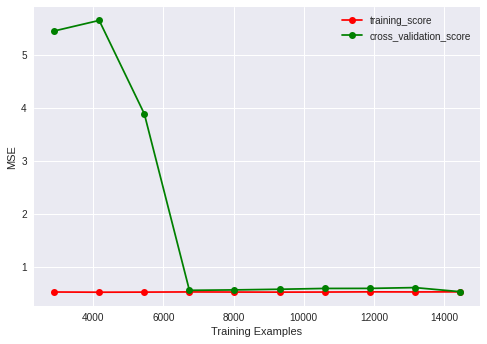

In [ ]:
plot_learning_curve(train_sizes,train_scores,test_scores,fit_times)

In [ ]:
def plot_scalability_curve(fit_times,train_sizes):
  plt.plot(train_sizes,np.mean(fit_times,axis=1),"o-",color='b')
  plt.xlabel("Training examples")
  plt.ylabel("Fit times")
  plt.legend(loc="best")
  plt.title("Scalability of the model")
  return


No handles with labels found to put in legend.


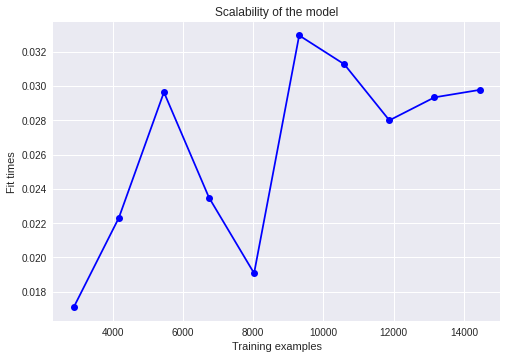

In [ ]:
plot_scalability_curve(fit_times,train_sizes)

####Examining the model

In [ ]:
features_names = x.columns
features_names

Index(['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup',
       'Latitude', 'Longitude'],
      dtype='object')

In [ ]:
weights_diff = [est[-1].coef_ for est in lin_reg_cv_re['estimator']]
weights_diff

[array([ 0.84489085,  0.1156853 , -0.27019687,  0.29078838, -0.0107715 ,
        -0.02805796, -0.8753289 , -0.84959869]),
 array([ 0.81946748,  0.12209911, -0.25869926,  0.30760453, -0.00374361,
        -0.04079515, -0.89789462, -0.86713954]),
 array([ 0.8451958 ,  0.11602956, -0.29562437,  0.34768769, -0.00227834,
        -0.03583966, -0.89643528, -0.86918065]),
 array([ 0.81776639,  0.11686949, -0.26625961,  0.30920021, -0.0087943 ,
        -0.0464042 , -0.92724922, -0.89142844]),
 array([ 0.83293751,  0.1196346 , -0.26798769,  0.29028308, -0.00520816,
        -0.02907631, -0.88012067, -0.85675738])]

In [ ]:
weights_diff_df = pd.DataFrame(weights_diff,columns=features_names)
weights_diff_df.index+=1
weights_diff_df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
1,0.844891,0.115685,-0.270197,0.290788,-0.010771,-0.028058,-0.875329,-0.849599
2,0.819467,0.122099,-0.258699,0.307605,-0.003744,-0.040795,-0.897895,-0.867140
3,0.845196,0.116030,-0.295624,0.347688,-0.002278,-0.035840,-0.896435,-0.869181
4,0.817766,0.116869,-0.266260,0.309200,-0.008794,-0.046404,-0.927249,-0.891428
5,0.832938,0.119635,-0.267988,0.290283,-0.005208,-0.029076,-0.880121,-0.856757


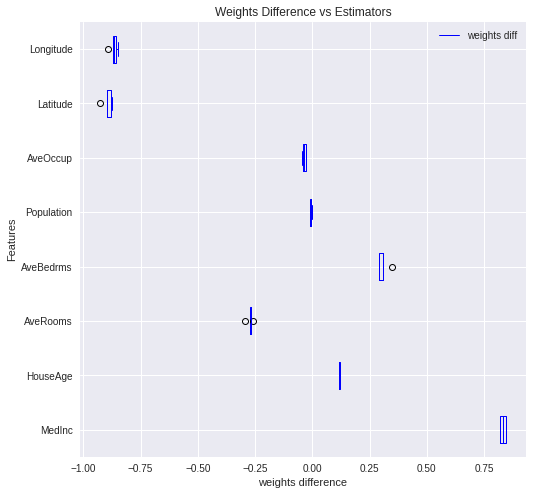

In [ ]:
weights_diff_df.plot(kind='box',figsize=(8,8),color='blue',vert=False)
plt.xlabel("weights difference")
plt.ylabel("Features")
plt.legend(["weights diff"],loc="best")
plt.title("Weights Difference vs Estimators")
plt.show()

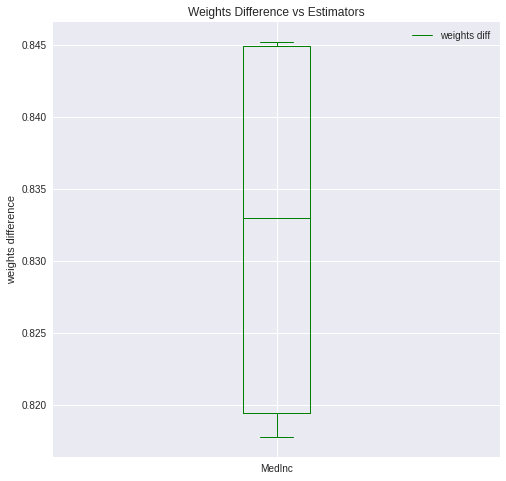

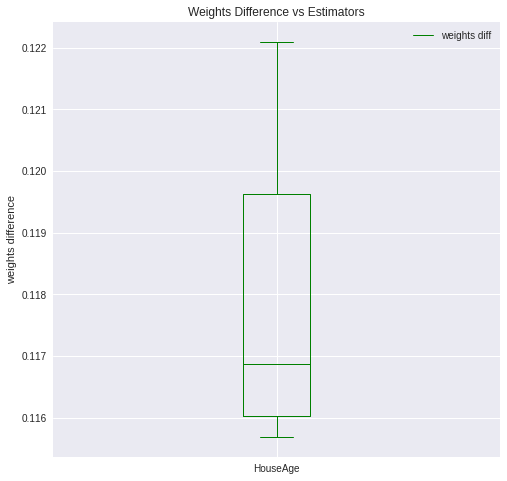

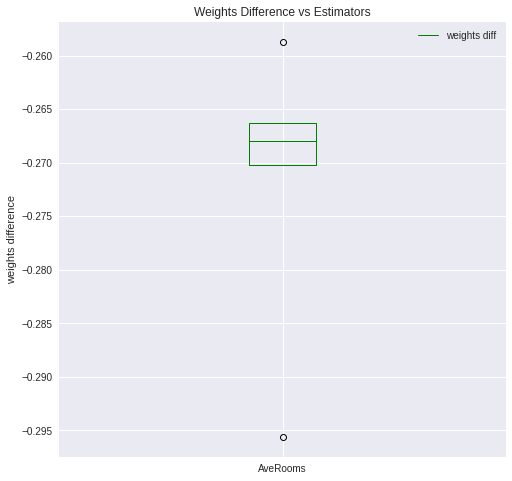

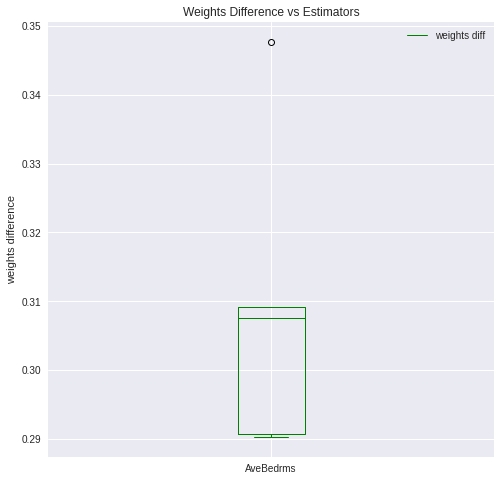

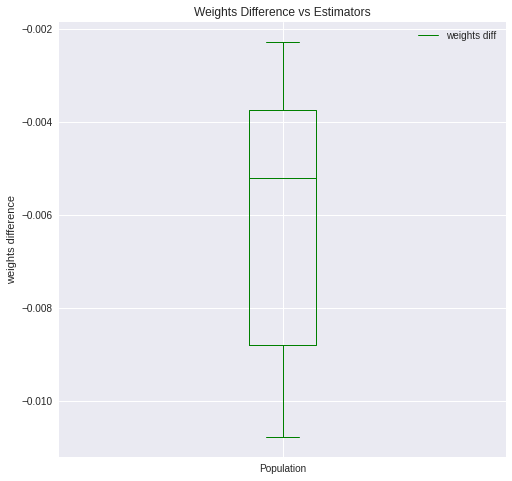

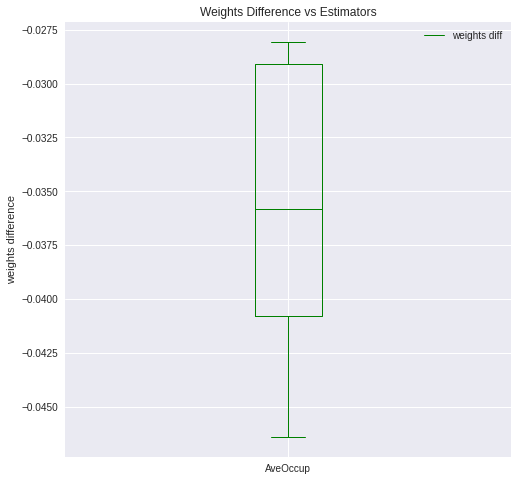

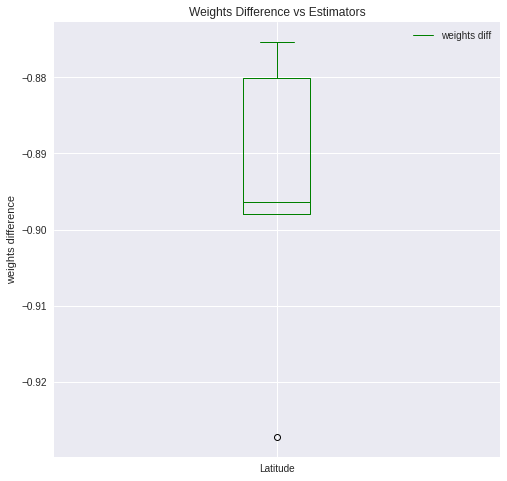

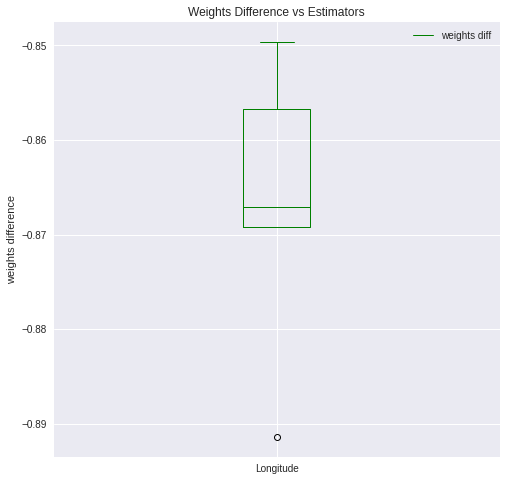

In [ ]:
for i in range(len(features_names)):
  weights_diff_df[features_names[i]].plot(kind='box',figsize=(8,8),color='green')
  plt.ylabel("weights difference")
  plt.legend(["weights diff"],loc="best")
  plt.title("Weights Difference vs Estimators")
  plt.show();

####Selecting Best Model
Now lets Select the best model evaluated using cross validation...

In [ ]:
# Model which evaluates lowest cross validated error on test set
best_model_index = np.argmin(test_mse_cv_re)
best_model = lin_reg_cv_re["estimator"][best_model_index]

In [ ]:
# Coefficients and Intercepts used in the best selected model.
best_model_coef = best_model[-1].coef_
print(f"Coefficient of the best selected model is: {best_model_coef}")
best_model_intercept = best_model[-1].intercept_
print(f"Intercept of the best selected model is: {best_model_intercept}")

Coefficient of the best selected model is: [ 0.81776639  0.11686949 -0.26625961  0.30920021 -0.0087943  -0.0464042
 -0.92724922 -0.89142844]
Intercept of the best selected model is: 2.0673835022148377


####Model Performance
Now let's get to the value predicted by our model using cross validation...

In [ ]:
cv_pred = cross_val_predict(lin_reg_pipeline,x_train,y_train)
cv_pred

array([1.93775944, 2.47741265, 2.65605484, ..., 2.0417395 , 2.83974766,
       2.26927572])

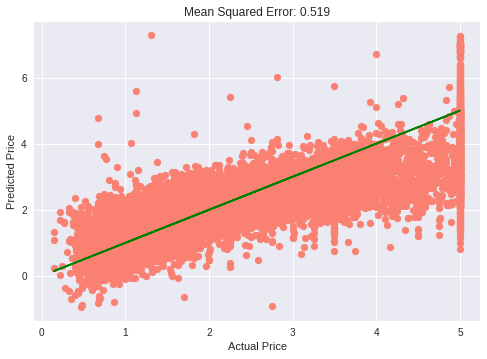

In [ ]:
mse_cv = mean_squared_error(y_train,cv_pred)
plt.scatter(y_train,cv_pred,color="salmon")
plt.plot(y_train,y_train,"r-",color="green")
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title(f"Mean Squared Error: {mse_cv:.3f}")
plt.show()



1.   The model seems tobe all over the placein its prediction for example with label 5.
2.   There are some negative predictions. We can fix this by adding constraints on the weights to be positive.

At this stage, we should perform error analysis and check where are prediction are going wrong. We can revisit feature construction,preprocessing or model stages and make the necessary course correction to get better performance.



### Step5: **Predictions**

Using the best model performance from cross validation for getting the prediction on the test set.

In [ ]:
best_model_pred = best_model.predict(x_test)
best_model_pred

array([0.7428291 , 1.77329866, 2.66726463, ..., 4.42609721, 1.21453476,
       2.00660735])

Using the initial model performance  for getting the prediction on the test set.

In [ ]:
init_model = lin_reg_pipeline.predict(x_test)
init_model

array([0.71912284, 1.76401657, 2.70965883, ..., 4.46877017, 1.18751119,
       2.00940251])

###Step6: **Model Performance**

In [ ]:
cv_score = best_model.score(x_test,y_test)
score = lin_reg_pipeline.score(x_test,y_test)
print(f"R2 score using best model via Cross Validation: {cv_score*100:.2f}%")
print(f"R2 score using the model without Cross validation: {score*100:.2f}%")

R2 score using best model via Cross Validation: 58.51%
R2 score using the model without Cross validation: 57.58%


So from this we can conclude that the performance of the model selected via cross validation is slightly higher than other models.
Hence, the above selected model can be used for prediction of the house price.
###Thank You!